# Extracting target contigs

In order to extract the contigs representing your target sequences (the sequences that were being captured during the sequence capture process), you need to provide a fasta file containing the reference sequences for all loci of interest. Ususally all sequences of interest should be present in the file that was used to design the RNA baits for sequence capture. If you are using some standarad RNA bait library that was not specifically designed for your organism group/project (e.g. [Ultraconserved Elements - UCEs](http://ultraconserved.org/)), you can usually find the reference library on the webpage of the developer or in the respective publication. If all else fails, you can try to extract sequences of the same loci that you captured, for organisms that are closely related to your taxa, e.g. from [NCBI GenBank](https://www.ncbi.nlm.nih.gov/genbank/).

The reference library should be in simple fasta format, containign one sequence per locus of interest. Here is an example of a reference library that was used in our example dataset of palms, extracted from [Heyduk et al., 2016](https://oup.silverchair-cdn.com/oup/backfile/Content_public/Journal/biolinnean/117/1/10.1111_bij.12551/1/bij12551.pdf?Expires=1501614586&Signature=I4wDg~SKpYmSEE9cEE0rZw2XLo9zcqFhPoijZ1Qeq78nX5XcnXSPwCw~9j4QxKH16BjKfkleb~wOF5RiKdTr0PmKkUYraQfeb7mD6jPBr5RgNlDcjsLV3ezZ1VyoT-4MZ9HxnYNPE0poXJcUXor1B5YYSYGBxxW1Q~zWYqzdos2VhoCP9eK7phRocpR~hhvbJx4aJDxAQdPleOpNPpknkkmoX~dTyHr2B8C7~t5v7f4DiZVEnOz0VQ9JbPw02iY13n67Qq2VfLA3HPYkui-PGfLKY0yCFKRp2xFrnjeIBV9TKZ~vuJngcua-L6URZ8cIdwzvo9GFAVDYxWUs0DywHw__&Key-Pair-Id=APKAIUCZBIA4LVPAVW3Q):

**Citation:** *Heyduk, K., Trapnell, D. W., Barrett, C. F., & Leebens-Mack, J. (2016). Phylogenomic analyses of species relationships in the genus Sabal (Arecaceae) using targeted sequence capture. Biological Journal of the Linnean Society, 117, 106–120.*

In [3]:
%%bash
head ../../data/raw/palm_reference_sequences.fasta

>Elaeis_1007_0
TGGGAGTCGCCGGGCATTTCTGGGATCTCCTCAAGCCCTACGCCCGGAACGAGGGCGTCGACTTCCTCCGGAACAAGCGCGTCGCCATCGACCTCTCCTTCTGGATCGTCCAGCACGGGGCTGCCATCCGCAACAAAACCTCTCGCCTCCGCAATCCCCACATCCGCACCACCTTTTTCCGTACTGTCGCCTTGTTT
>Elaeis_1007_1
TCGAAGATGGGGGCGTTCCCGGTGTTCGTCGTTGACGGCGAGCCATCGCCGTTGAAGACGCAGGCAAGGATGGAGCGCTTCTTCTGCAACTCTGGTGTTGATCCTTCGACGCTGTCGAAGGCGGAGGAAGGGGAGGAGTCTCCTGTGAAACAGAGGAATCAGGCATTCACCAGATGCGTTCGGGAGTGCGTG
>Elaeis_1007_2
GAACTCCTCGAAATCCTAGGGATGCCAGTTCTAAGAGCATGTGGTGAGGCTGAAGCCCTGTGTGCACAGTTAAATAGTGAAGGCCATGTTGATGCTTGCATCACTGCCGACAGTGATGCTTTCCTGTTTGGGGCGAAATGTGTCATAAAGTGCCTTCGCTCCAATTGCAAG
>Elaeis_1007_3
GACCCATTTGAGTGCTACAACATATCAGATGTTGAAGCTGGTCTTGGTTTGAAGAGAAAACAAATGGTAGCCATTGCTCTTCTGGTCGGTAATGACCATGATTTGCATGGGGTATCTGGGTTTGGGGGTTGATACGGCTGTCCGATTTGTAAAGATGTTTAGTGAGGATGAAATTTTGGCTA
>Elaeis_1007_4
GGTTATGTGAGGTTGGTAAAGGGGTTTTCCCTTTTTCAGAGGGAAGCATCAGTTTGGCCATGGATCCCCACATGCCTATTTCAAATGAGGTTTCACCGAGTGCAAGATCTCCACACTGCTCACATTGTGGTCACCCAGGCAGCAAGAAAGCTCATCAGAAGACTGCTTGTGAATACTGT

## Find and extract all target contigs
Once you got your reference fasta files ready you are good to start with extracting the contigs of interest. For this purpose we want to create an overview over which contigs represent which reference locus in each sample. At the same time we also have to be somewhat selective and discard potential duplicates that match several loci. Let's check the function that helps you do this:

In [2]:
%%bash
source activate secapr_env
secapr find_target_contigs -h

usage: secapr find_target_contigs [-h] --contigs CONTIGS --reference REFERENCE
                                  --output OUTPUT
                                  [--min-coverage MIN_COVERAGE]
                                  [--min-identity MIN_IDENTITY]
                                  [--keep-duplicates] [--keep-paralogs]
                                  [--disable_stats]

Extract the contigs that match the reference database

optional arguments:
  -h, --help            show this help message and exit
  --contigs CONTIGS     The directory containing the assembled contigs in
                        fasta format.
  --reference REFERENCE
                        The fasta-file containign the reference sequences
                        (probe-order-file).
  --output OUTPUT       The directory in which to store the extracted target
                        contigs and lastz results.
  --min-coverage MIN_COVERAGE
                        The minimum percent coverage required for a match
 

Note that in this step SECAPR will index all your locus names stored in the reference file, so in all downstream steps your loci will carry a numerical index. The translation table holding the information which index corresponds to which locus name is stored in a text file in the output folder (`reference_fasta_header_info.txt`).

The sensitivity of the blast algorithm (LASTZ) can be altered with the flags `--min-coverage` and `--min-identity`. High values mean conservative matching requirements, while low values will return more matches but also possibly non-orthologous sequences.

However, being to lenient with the `--min-coverage` and `--min-identity` flags can also lead to an increase of loci that are identified as paralogous, which happens when more than 1 contig matches the reference sequence.

You can choose to add the `--keep-duplicates` flag, in order to also keep contigs which span across multiple loci. These will be extracted independently for each contig thhey match and may hence be present in several copies in the FASTA file containing your extracted contigs. If this flag is used a txt file with the duplicate information for each sample is being printed into the samples output folder (`reference_fasta_header_info.txt`). This file contains the contig ID in the first column, followed by the list of reference loci indeces that the contig matched to.

The `--keep-paralogs` flag should be used with caution. This will lead to SECAPR keeping loci for which indications of paralogy were found. These loci should generally not be used for phylogenetic inferences, but they may be of interest in some cases. If this flag is used a txt file with the paralog information for each sample is being printed into the samples output folder (`info_paralogous_loci.txt`). This file contains the reference locus index in the first column, followed by a list of contig names that matched to the locus.



Now let's run the script.

    secapr find_target_contigs --contigs ../../data/processed/contigs/ --reference ../../data/raw/palm_reference_sequences.fasta --output ../../data/processed/target_contigs --keep-duplicates
    
To get a first idea of the resulting matches, you can have a look at the file `match_table.txt` in the output folder.

In [12]:
import pandas as pd
table = pd.read_csv('../../data/processed/target_contigs/match_table.txt', delimiter = '\t',index_col=0)
table.head()

,1082,1061,1086,1140,1065,1087,1074,1064,1083,1070,1166,1073,1080,1063,1085,1079,1068
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


Those fields containing a '1' indicate that a unique match was extracted from the contig sequences for the respective exon and sample. If the output reveals a very low harvest of target sequences, you can try to reduce the values for the flags `--min-coverage` and `--min-identity` in order to be more generous in the matching step. If on the other hand your output turns out to capture a lot of non-homologous sequences between the different samples (can be identified after the [alignment step](align_contigs.ipynb)), you may want to turn up the values for these flags in order to be more conservative in your search.

The script also prints out summary stats in a textfile in the output folder:

In [13]:
%%bash
cat ../../data/processed/target_contigs/summary_stats.txt

Total number of samples: 17
Total number of targeted exons: 837

120 exons are shared by all samples.

1082: 556 extracted contigs
1061: 545 extracted contigs
1086: 516 extracted contigs
1140: 469 extracted contigs
1065: 544 extracted contigs
1087: 562 extracted contigs
1074: 531 extracted contigs
1064: 543 extracted contigs
1083: 534 extracted contigs
1070: 539 extracted contigs
1166: 544 extracted contigs
1073: 529 extracted contigs
1080: 531 extracted contigs
1063: 525 extracted contigs
1085: 512 extracted contigs
1079: 550 extracted contigs
1068: 563 extracted contigs
mean: 534.882353 stdev: 21.605779

Let's plot the matrix for a better overview of our contig data:

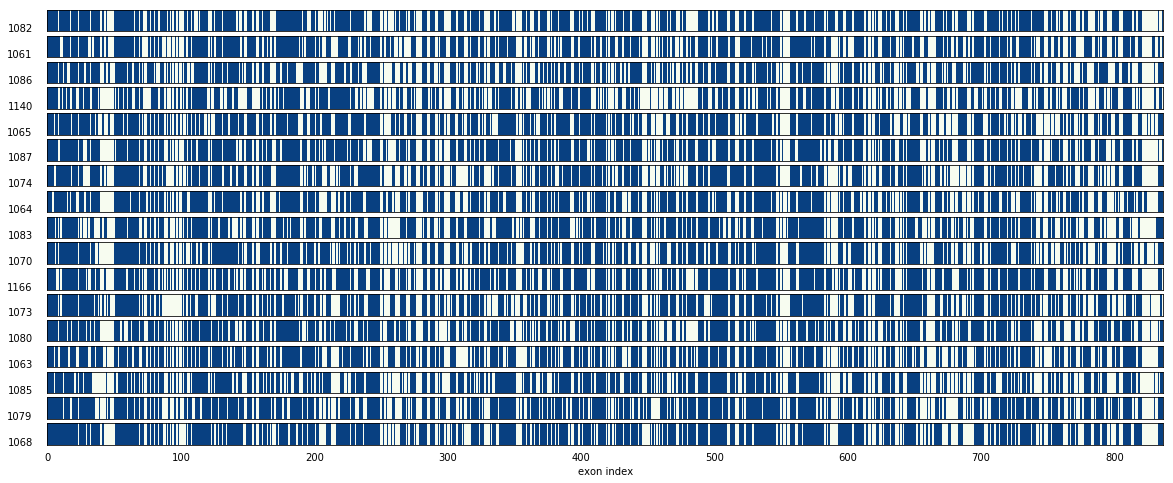

In [10]:
import sys
sys.path.append("../../src")
import plot_contig_data_function as secapr_plot

match_table_path = '../../data/processed/target_contigs/match_table.txt'

contig_yield = secapr_plot.plot_contig_yield(match_table_path)
contig_yield

Blue means "presence" and white "absence" of the respective sequence in the final contig file. SECAPR also prints a separate text file with an overview which exon index coressponds to which locus. It appears that most loci were recovered for most samples. Further  there are gaps in some places for all samples, which could indicate that the bait sequences for that locus are not very suitable for our sample data of the genus _Geonoma_.

If you are satisfied with your contig yield you are ready to continue to the [alignment step](align_contigs.ipynb).

[Previous page](contig_assembly.ipynb) | [Next page](align_contigs.ipynb)